# [Lab Session 3](fourier.ipynb)


In [129]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


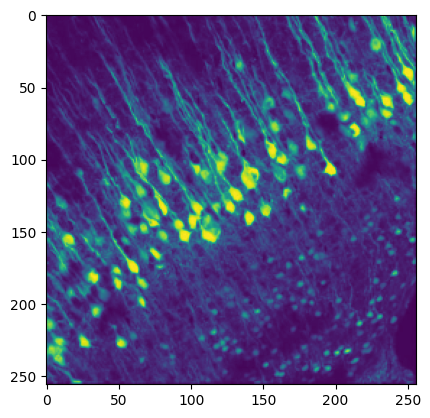

In [130]:
cell_img = plt.imread('data/cells.png')
cell_img = resize(cell_img, output_shape = (256,256))
plt.imshow(cell_img)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [131]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)

complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [132]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

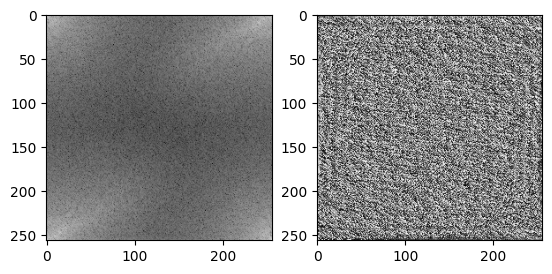

In [133]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


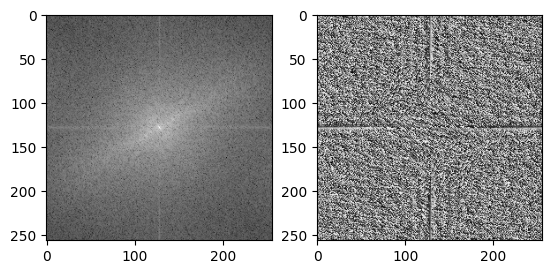

In [134]:
cell_ft_shift = np.fft.fftshift(cell_ft)

amplitude_shift = np.abs(cell_ft_shift)
phase_shift = np.angle(cell_ft_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


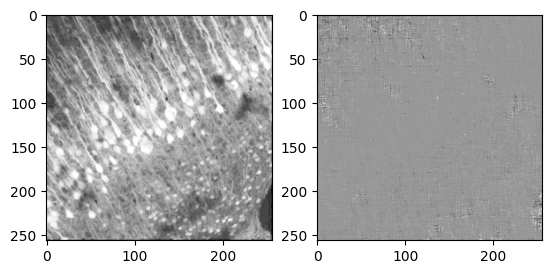

In [135]:
cell_ft_img = np.fft.ifft2(cell_ft)

amplitude_img = np.abs(cell_ft_img)
phase_img = np.angle(cell_ft_img)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_img), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_img, 'gray')

---


**[Task 2 (a).]()** Load the brain MR image.


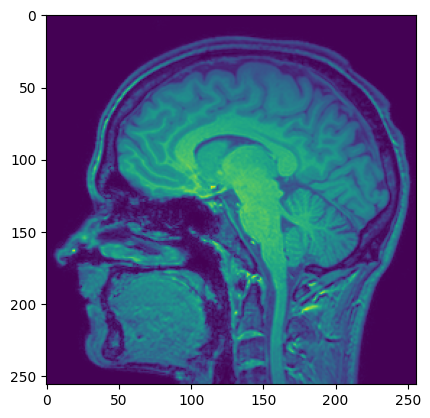

In [136]:
MR_img = plt.imread('data/brain_mri.png')
MR_img = resize(MR_img, output_shape = (256,256))
plt.imshow(MR_img)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


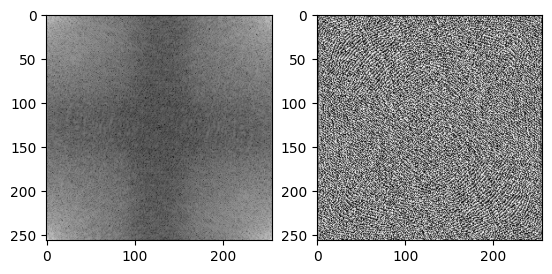

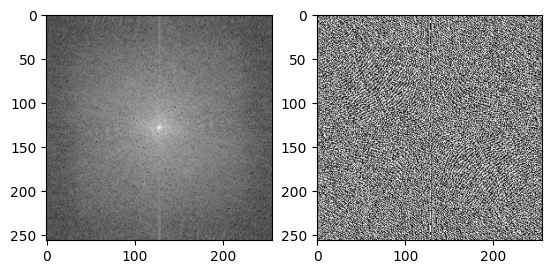

In [137]:
MR_ft = np.fft.fft2(MR_img)

amplitude_MR = np.abs(MR_ft)
phase_MR = np.angle(MR_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_MR), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_MR, 'gray')

cell_MR_shift = np.fft.fftshift(MR_ft)

amplitude_MR_shift = np.abs(cell_MR_shift)
phase_MR_shift = np.angle(cell_MR_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_MR_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_MR_shift, 'gray')

In [138]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


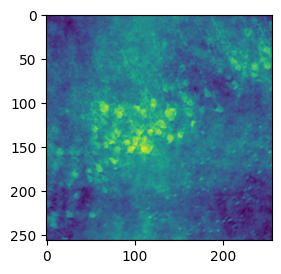

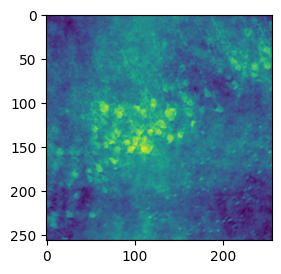

In [139]:
merged_non_shift = to_complex_array(amplitude_MR, phase)
merged_shift = to_complex_array(amplitude_MR_shift, phase_shift)

merged_complex_shift = np.fft.ifftshift(merged_shift)

merged_image_shift = np.fft.ifft2(merged_complex_shift)
merged_image_no_shift = np.fft.ifft2(merged_non_shift)

merged_image_shift1 = np.real(merged_image_shift)
merged_image_no_shift1 = np.real(merged_image_no_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_shift1)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_no_shift1)

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


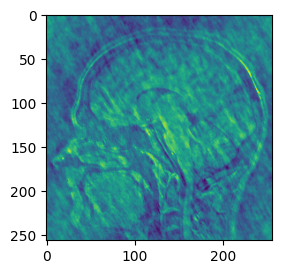

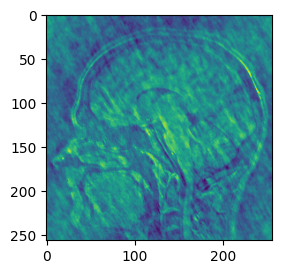

In [140]:
merged_non_shift = to_complex_array(amplitude, phase_MR)
merged_shift = to_complex_array(amplitude_shift, phase_MR_shift)

merged_complex_shift = np.fft.ifftshift(merged_shift)

merged_image_shift = np.fft.ifft2(merged_complex_shift)
merged_image_no_shift = np.fft.ifft2(merged_non_shift)

merged_image_shift2 = np.real(merged_image_shift)
merged_image_no_shift2 = np.real(merged_image_no_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_shift2)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_no_shift2)

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [141]:
filter_window_size = 50

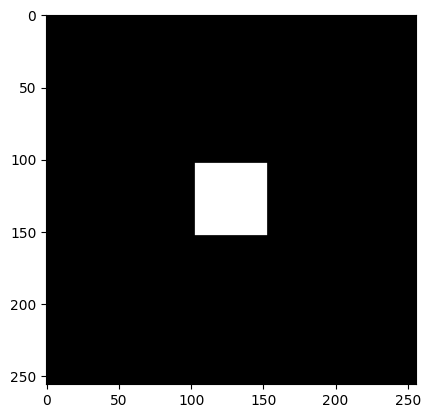

In [142]:


# Example image shape (replace with your image’s shape)
rows, cols =  (256, 256)

# Filter window size (rectangle of ones)
win_rows = 50
win_cols = 50 

# Create mask filled with zeros
low_pass_mask = np.zeros((rows, cols))

# Compute center of the image
center_r, center_c = rows // 2, cols // 2

# Compute start and end coordinates for rectangle
r_start = center_r - win_rows // 2
r_end   = center_r + win_rows // 2
c_start = center_c - win_cols // 2
c_end   = center_c + win_cols // 2

# Insert rectangle of ones
low_pass_mask[r_start:r_end, c_start:c_end] = 1

# Display mask
plt.imshow(low_pass_mask, cmap='gray')
plt.show()


**[Task 3 (b).]()** Create a highpass filter maks.


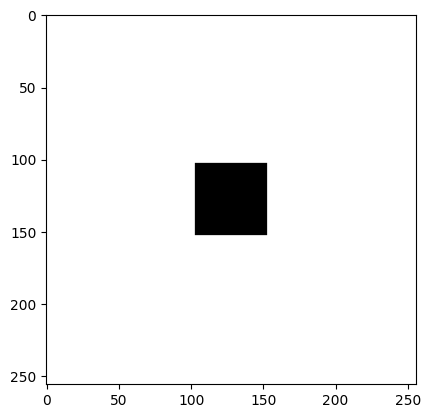

In [143]:
# Create high-pass mask = 1 - low-pass
high_pass_mask = 1 - low_pass_mask

# Display high-pass mask
plt.imshow(high_pass_mask, cmap='gray')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_1277/2243098655.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude_MR_shift * low_pass_mask), 'gray')
/tmp/ipykernel_1277/2243098655.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude_MR_shift * high_pass_mask), 'gray')


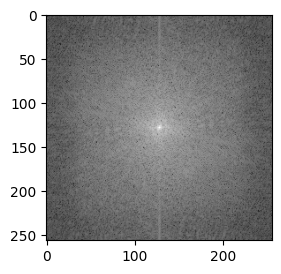

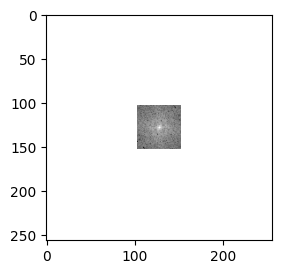

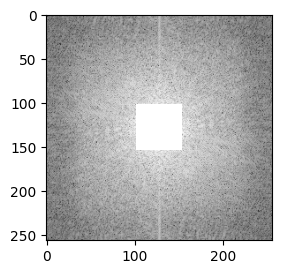

In [156]:
amplitude_MR_shift = np.abs(cell_MR_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_MR_shift), 'gray')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_MR_shift * low_pass_mask), 'gray')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_MR_shift * high_pass_mask), 'gray')

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


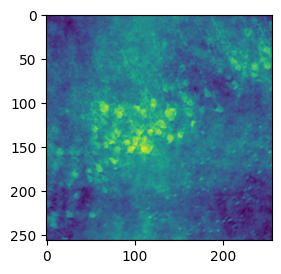

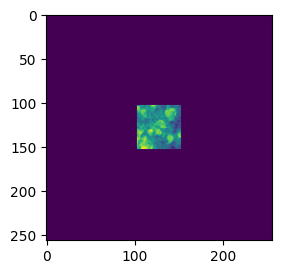

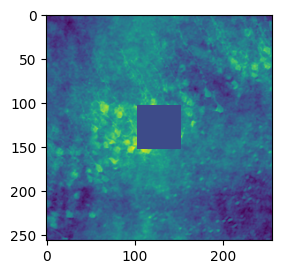

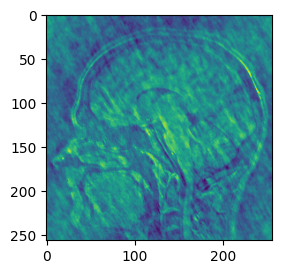

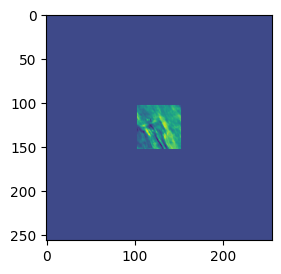

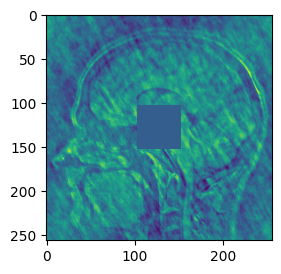

In [145]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_shift1)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_no_shift1 * low_pass_mask)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_no_shift1 * high_pass_mask)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_shift2)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_shift2 * low_pass_mask)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(merged_image_no_shift2 * high_pass_mask)

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [146]:
import numpy as np

def my_dft(img):
    
    M, N = img.shape
    dft = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum_value = 0.0 + 0.0j
            for x in range(M):
                for y in range(N):
                    angle = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_value += img[x, y] * np.exp(angle)
            dft[u, v] = sum_value

    return dft


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [147]:
def my_idft(img):
    
    M, N = img.shape
    idft = np.zeros((M, N), dtype=complex)

    for x in range(M):
        for y in range(N):
            sum_value = 0.0 + 0.0j
            for u in range(M):
                for v in range(N):
                    angle = 2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_value += img[u, v] * np.exp(angle)
            idft[x, y] = sum_value / (M * N)

    return idft


Due to high computational costs, we need to resize the image.


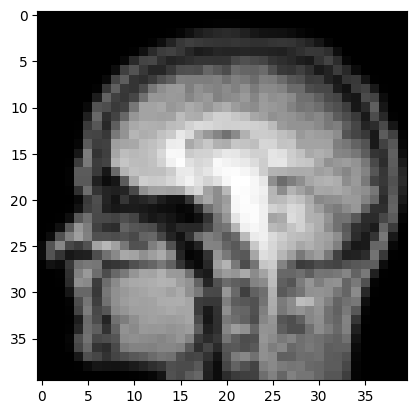

In [148]:
test_img = resize(MR_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


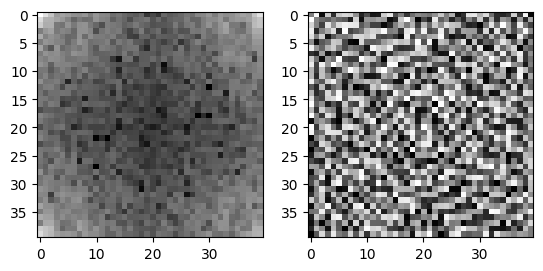

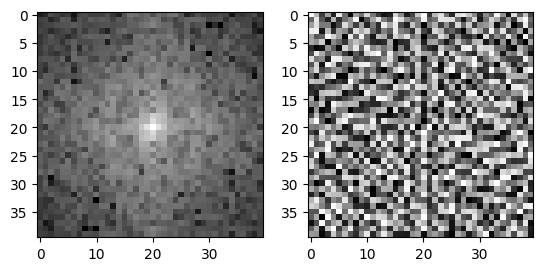

In [149]:
brain_dft = my_dft(test_img)


amplitude_shift_dft = np.abs(brain_dft)
phase_shift_dft = np.angle(brain_dft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift_dft), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift_dft, 'gray')

brain_ft_shift_dft = np.fft.fftshift(brain_dft)


amplitude_shift_dft = np.abs(brain_ft_shift_dft)
phase_shift_dft = np.angle(brain_ft_shift_dft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift_dft), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift_dft, 'gray')

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


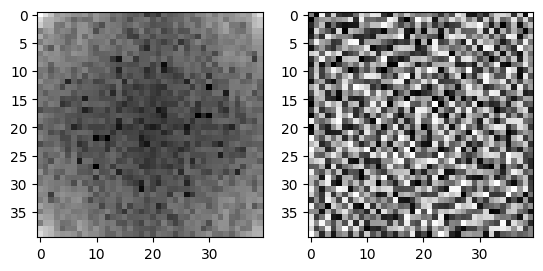

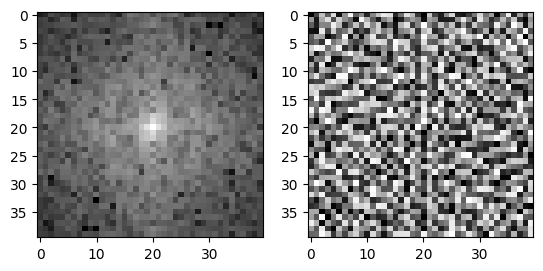

In [150]:
brain_idft = my_idft(test_img)


amplitude_shift_idft = np.abs(brain_idft)
phase_shift_idft = np.angle(brain_idft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift_idft), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift_idft, 'gray')


brain_ft_shift_idft = np.fft.fftshift(brain_idft)


amplitude_shift_idft = np.abs(brain_ft_shift_idft)
phase_shift_idft = np.angle(brain_ft_shift_idft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift_idft), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift_idft, 'gray')

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [152]:
MR_img = plt.imread('data/brain_mri.png')
MR_img = resize(MR_img, output_shape = (40,40))
MR_ft = np.fft.fft2(MR_img)

# Compare using np.allclose
print("Arrays nearly equal? →", np.allclose(brain_dft, MR_ft))


Arrays nearly equal? → True


**[Task 4 (f).]()** Round the arrays and compare them again.


In [154]:
# Mean absolute difference
mean_diff = np.mean(np.abs(brain_dft - MR_ft))
print("Mean difference =", mean_diff)

# Try rounding to 5 decimals (adjust if needed)
own_round = np.round(brain_dft, 5)
np_round  = np.round(MR_ft, 5)

print("Exact equality after rounding? →", (own_round == np_round).all())


Mean difference = 1.2069960506026965e-13
Exact equality after rounding? → True


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [155]:
%timeit my_dft(brain_dft)
%timeit np.fft.fft2(MR_ft, norm='forward')


4.32 s ± 70.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
41.3 μs ± 13.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
